In [1]:
# Importa o Sympy
import sympy as sp

# Importa o Numpy
import numpy as np

# Importa o Matplot lib
import matplotlib.pyplot as plt

# Importa o módulo Toolbox
import Toolbox as T




In [2]:
# Equação Diferencial
# d²T/dx² = x ; x E (0,1)


# Define variável
x = sp.symbols('x')
x0 = 0
x1 = 1

# EDO
Temperatura = sp.Function('T')(x)
F = sp.Eq((sp.diff(Temperatura,x,2)),-2)

print(sp.latex(F))

##Inicio da Função
# Integração da Resolução Analítica
T_analitico = sp.dsolve(F,Temperatura)

print(sp.latex(T_analitico))

# sp.pprint(T_analitico)

#Extraio o lado direito da equação
T_analitico = T_analitico.rhs

# Declaro as CCs
cc1 = sp.Eq(T_analitico.subs(x, 1), -1)
cc2 = sp.Eq(sp.diff(T_analitico,x).subs(x, 0), 1)

ccs = [cc1,cc2]

# Declaro as constantes
C1,C2 = sp.symbols('C1 C2')

CONSTS = [C1,C2]

#Resolvo para as constantes
constantes = sp.solve(ccs,CONSTS)

print(sp.latex(constantes))

T_analitico = T_analitico.subs(constantes)

print(sp.latex(T_analitico))
# Fim da Função

\frac{d^{2}}{d x^{2}} T{\left(x \right)} = -2
T{\left(x \right)} = C_{1} + C_{2} x - x^{2}
\left\{ C_{1} : -1, \  C_{2} : 1\right\}
- x^{2} + x - 1


In [3]:
# Solução por Resíduos ponderados sem integração por partes:
# Base Polinomial
x = sp.symbols('x')

a0, a1, a2, a3,a4  = sp.symbols('a0 a1 a2 a3 a4')
b0, b1, b2, b3,b4  = sp.symbols('b0 b1 b2 b3 b4')

base = (a0,a1, a2, a3)

# Base
f_base = a0+a1*x+a2*x**2+a3*x**3

base_w = b0+b1*x+b2*x**2+b3*x**3

print(sp.latex(f_base))

f_compat,t = T.compatibiliza_cc_com_derivada(f_base,x,base,[('valor',1,-1),('derivada',0,1)])

print(sp.latex(f_compat))

# Defino o residuo e monto as equações do sistema linear
residuo = sp.diff(f_compat,x,2) + 2

base_w,t = T.compatibiliza_cc_com_derivada(base_w,x,[b0, b1, b2, b3],[('valor',1,-1),('derivada',0,1)])

equacoes_residuo = sp.integrate(residuo * base_w, (x, 0, 1)).expand()

eqs = [sp.collect(equacoes_residuo,b, evaluate=False).get(b, 0) for b in (b0, b1,b2,b3)]

sp.pprint(eqs)

sol = sp.solve(eqs,base)
sp.pprint(sol)

f_residuos_pond_1 = f_compat.subs(sol)

sp.pprint(f_residuos_pond_1)

print(sp.latex(f_residuos_pond_1))

a_{0} + a_{1} x + a_{2} x^{2} + a_{3} x^{3}
a_{2} x^{2} - a_{2} + a_{3} x^{3} - a_{3} + x - 2
⎡        4⋅a₂   3⋅a₃   4    3⋅a₂   9⋅a₃   3⎤
⎢0, 0, - ──── - ──── - ─, - ──── - ──── - ─⎥
⎣         3      2     3     2      5     2⎦
{a₂: -1, a₃: 0}
   2        
- x  + x - 1
- x^{2} + x - 1


In [17]:
# Solução por Resíduos ponderados sem integração por partes:
# Base Senoidal
x = sp.symbols('x')

a0, a1, a2, a3 ,a4  = sp.symbols('a0 a1 a2 a3 a4')
b0, b1, b2, b3 ,b4 = sp.symbols('b0 b1 b2 b3 b4')

base = (a0,a1, a2, a3,a4)

f_base = a4 + a0*sp.sin(sp.pi*x)+a1*sp.sin(2*sp.pi*x)+a2*sp.sin(3*sp.pi*x)+a3*sp.sin(4*sp.pi*x)
base_w = b4 + b0*sp.sin(sp.pi*x)+b1*sp.sin(2*sp.pi*x)+b2*sp.sin(3*sp.pi*x)+b3*sp.sin(4*sp.pi*x)

print(sp.latex(f_base))

f_compat,t = T.compatibiliza_cc_com_derivada(f_base,x,base,[('valor',1,-1),('derivada',0,1)])

print(sp.latex(f_compat))

# Defino o residuo e monto as equações do sistema linear
residuo = sp.diff(f_compat,x,2) + 2

base_w,t = T.compatibiliza_cc_com_derivada(base_w,x,[b0, b1, b2, b3,b4],[('valor',1,-1),('derivada',0,1)])

equacoes_residuo = sp.integrate(residuo * base_w, (x, 0, 1)).expand()

eqs = [sp.collect(equacoes_residuo, b, evaluate=False).get(b, 0) for b in (b0, b1,b2,b3,b4)]

sol = sp.solve(eqs,base)
sp.pprint(sol)

f_residuos_pond_2 = f_compat.subs(sol)

sp.pprint(f_residuos_pond_2)

print(sp.latex(f_residuos_pond_2.evalf()))


a_{0} \sin{\left(\pi x \right)} + a_{1} \sin{\left(2 \pi x \right)} + a_{2} \sin{\left(3 \pi x \right)} + a_{3} \sin{\left(4 \pi x \right)} + a_{4}
\frac{\left(- \pi \left(2 a_{1} + 3 a_{2} + 4 a_{3}\right) + 1\right) \sin{\left(\pi x \right)} + \pi \left(a_{1} \sin{\left(2 \pi x \right)} + a_{2} \sin{\left(3 \pi x \right)} + a_{3} \sin{\left(4 \pi x \right)} - 1\right)}{\pi}
⎧             2               2               2⎫
⎪    -80 + 9⋅π       -16 + 3⋅π       -80 + 9⋅π ⎪
⎨a₁: ──────────, a₂: ──────────, a₃: ──────────⎬
⎪          3               3                3  ⎪
⎩      72⋅π            36⋅π            144⋅π   ⎭
  ⎛⎛         2⎞              ⎛         2⎞              ⎛         2⎞            ↪
  ⎜⎝-80 + 9⋅π ⎠⋅sin(2⋅π⋅x)   ⎝-16 + 3⋅π ⎠⋅sin(3⋅π⋅x)   ⎝-80 + 9⋅π ⎠⋅sin(4⋅π⋅x) ↪
π⋅⎜─────────────────────── + ─────────────────────── + ─────────────────────── ↪
  ⎜             3                         3                         3          ↪
  ⎝         72⋅π                      36⋅π          

In [19]:
# Solução por Resíduos ponderados sem integração por partes:
# Base Exponencial
x = sp.symbols('x')

a0, a1, a2, a3,a4  = sp.symbols('a0 a1 a2 a3 a4')
b0, b1, b2, b3,b4  = sp.symbols('b0 b1 b2 b3 b4')

base = (a0,a1, a2, a3, a4)

f_base = a4 + a0*sp.exp(x)+a1*sp.exp(2*x)+a2*sp.exp(-x)+a3*sp.exp(-2*x)

base_w = b4 + b0*sp.exp(x)+b1*sp.exp(2*x)+b2*sp.exp(-x)+b3*sp.exp(-2*x)

print(sp.latex(f_base))

f_compat,t = T.compatibiliza_cc_com_derivada(f_base,x,base,[('valor',1,-1),('derivada',0,1)])

print(sp.latex(f_compat))

# Defino o residuo e monto as equações do sistema linear
residuo = sp.diff(f_compat,x,2) +2

base_w,t = T.compatibiliza_cc_com_derivada(base_w,x,[b0, b1, b2, b3,b4],[('valor',0,1),('derivada',0,1)])

equacoes_residuo = sp.integrate(residuo * base_w, (x, 0, 1)).expand()

eqs = [sp.collect(equacoes_residuo, b, evaluate=False).get(b, 0) for b in (b0, b1,b2,b3,b4)]

sol = sp.solve(eqs,base)
sp.pprint(sol)

f_residuos_pond_3 = f_compat.subs(sol)

sp.pprint(f_residuos_pond_3)

print(sp.latex(f_residuos_pond_3.evalf()))


a_{0} e^{x} + a_{1} e^{2 x} + a_{2} e^{- x} + a_{3} e^{- 2 x} + a_{4}
\frac{\left(a_{2} \left(2 - e\right) e^{x + 3} + a_{3} \left(2 - e\right) e^{3} + a_{4} \left(2 - e\right) e^{2 x + 3} + \left(- e a_{2} \left(2 + e^{3}\right) - 2 a_{3} \left(1 + e^{4}\right) - \left(2 a_{4} + 2 + e^{2}\right) e^{2} + \left(e a_{2} \left(1 + e^{2}\right) + a_{3} \left(1 + 2 e^{3}\right) + \left(a_{4} + 1 + e\right) e^{2}\right) e^{x}\right) e^{3 x}\right) e^{- 2 x - 3}}{2 - e}
⎧            9          7        11         5         2                4       ↪
⎪    - 7284⋅ℯ  - 34128⋅ℯ  - 264⋅ℯ   - 2520⋅ℯ  - 3381⋅ℯ  + 12⋅ℯ + 1899⋅ℯ  + 840 ↪
⎨a₂: ───────────────────────────────────────────────────────────────────────── ↪
⎪            9          7         5         2                     3    12      ↪
⎩    - 3716⋅ℯ  - 16152⋅ℯ  - 1848⋅ℯ  - 2376⋅ℯ  - 132⋅ℯ - 1 + 4892⋅ℯ  + ℯ   + 35 ↪

↪    3       12          6         10          8                      8        ↪
↪ 8⋅ℯ  + 43⋅ℯ   + 18570⋅ℯ  + 1275⋅ℯ   + 23418

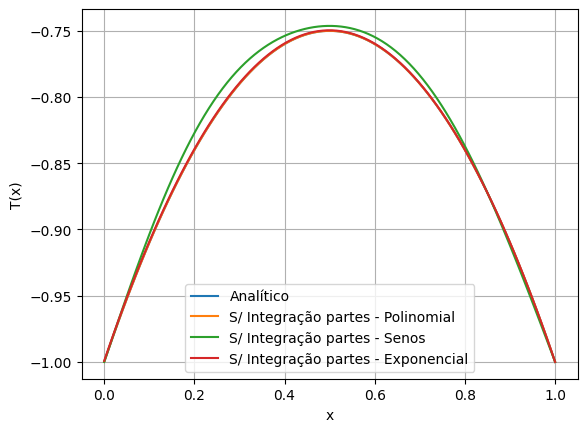

In [ ]:
T.prepara_plot(T_analitico,x,x0,x1,"Analítico")
T.prepara_plot(f_residuos_pond_1,x,x0,x1,"S/ Integração partes - Polinomial")
T.prepara_plot(f_residuos_pond_2,x,x0,x1,"S/ Integração partes - Senos")
T.prepara_plot(f_residuos_pond_3,x,x0,x1,"S/ Integração partes - Exponencial")
plt.xlabel('x')
plt.ylabel('T(x)')
plt.grid(True)
plt.legend()
plt.show()

In [7]:
## Fazendo integração por partes

# Solução por Resíduos ponderados com integração por partes:
# Base Polinomial Completa
x = sp.symbols('x')

a0, a1, a2, a3, a4  = sp.symbols('a0 a1 a2 a3 a4')
b0, b1, b2, b3, b4  = sp.symbols('b0 b1 b2 b3 b4')

base = (a0,a1,a2,a3)

# Base
f_base = a0+a1*x+a2*x**2+a3*x**3

base_w = b0 + b1*x+b2*x**2+b3*x**3

print(sp.latex(f_base))

f_compat,t = T.compatibiliza_cc_com_derivada(f_base,x,base,[('valor',1,-1),('derivada',0,1)])

print(sp.latex(f_compat))

base_w,t = T.compatibiliza_cc_com_derivada(base_w,x,[b0, b1, b2, b3],[('valor',1,-1),('derivada',0,1)])

df = sp.diff(f_compat,x)
dw = sp.diff(base_w,x)

# termo da derivada fraca: -∫ dT/dx * dw/dx dx
termo_interior = -sp.integrate(df * dw, (x, x0, x1))

# termo de contorno: [dT/dx * w] de 0 a 1
termo_contorno = (df * base_w).subs(x, x1) - (df * base_w).subs(x, x0)

# termo da fonte: -∫ f(x) * w dx
termo_fonte = -sp.integrate(-2 * base_w, (x, x0, x1))

equacoes_residuo_int_partes = (termo_interior + termo_contorno + termo_fonte).simplify()

eqs = [sp.collect(equacoes_residuo_int_partes, b, evaluate=False).get(b, 0) for b in (b0, b1,b2,b3)]

sol = sp.solve(eqs,base)
sp.pprint(sol)

f_residuos_pond_4 = f_compat.subs(sol)

sp.pprint(f_residuos_pond_4)

print(sp.latex(f_residuos_pond_4))



a_{0} + a_{1} x + a_{2} x^{2} + a_{3} x^{3}
a_{2} x^{2} - a_{2} + a_{3} x^{3} - a_{3} + x - 2
{a₂: -1, a₃: 0}
   2        
- x  + x - 1
- x^{2} + x - 1


In [8]:
## Fazendo integração por partes

# Solução por Resíduos ponderados com integração por partes:
# Base Polinomial incompleta
x = sp.symbols('x')

a0, a1, a2, a3  = sp.symbols('a0 a1 a2 a3')
b0, b1, b2, b3  = sp.symbols('b0 b1 b2 b3')

base = (a0,a1)

# Base
f_base = a0 + a1*x

base_w = b0 + b1*x

print(sp.latex(f_base))

f_compat,t = T.compatibiliza_cc_com_derivada(f_base,x,base,[('valor',1,-1),('derivada',0,1)])

print(sp.latex(f_compat))

base_w,t = T.compatibiliza_cc_com_derivada(base_w,x,[b0,b1],[('valor',1,-1),('derivada',0,1)])

df = sp.diff(f_compat,x)
dw = sp.diff(base_w,x)

# termo da derivada fraca: -∫ dT/dx * dw/dx dx
termo_interior = -sp.integrate(df * dw, (x, x0, x1))

# termo de contorno: [dT/dx * w] de 0 a 1
termo_contorno = (df * base_w).subs(x, x1) - (df * base_w).subs(x, x0)

# termo da fonte: -∫ f(x) * w dx
termo_fonte = -sp.integrate(-2 * base_w, (x, x0, x1))

equacoes_residuo_int_partes = (termo_interior + termo_contorno + termo_fonte).simplify()

eqs = [sp.collect(equacoes_residuo_int_partes, b, evaluate=False).get(b, 0) for b in (b0, b1,b2,b3)]

sol = sp.solve(eqs,base)
sp.pprint(sol)

f_residuos_pond_5 = f_compat.subs(sol)

sp.pprint(f_residuos_pond_5)

print(sp.latex(f_residuos_pond_5))



a_{0} + a_{1} x
x - 2
[]
x - 2
x - 2


In [9]:
## Fazendo integração por partes

# Solução por Resíduos ponderados com integração por partes:
# Base seno 2 termos
x = sp.symbols('x')

a0, a1, a2, a3  = sp.symbols('a0 a1 a2 a3')
b0, b1, b2, b3  = sp.symbols('b0 b1 b2 b3')

base = (a0,a1,a2)

# Base
f_base = a2+ a0*sp.sin(sp.pi*x) + a1*sp.sin(2*sp.pi*x)

base_w = b2+b0*sp.sin(sp.pi*x) + b1*sp.sin(2*sp.pi*x)

print(sp.latex(f_base))

f_compat,t = T.compatibiliza_cc_com_derivada(f_base,x,base,[('valor',1,-1),('derivada',0,1)])

print(sp.latex(f_compat))

base_w,t = T.compatibiliza_cc_com_derivada(base_w,x,[b0,b1,b2],[('valor',1,-1),('derivada',0,1)])

df = sp.diff(f_compat,x)
dw = sp.diff(base_w,x)

# termo da derivada fraca: -∫ dT/dx * dw/dx dx
termo_interior = -sp.integrate(df * dw, (x, x0, x1))

# termo de contorno: [dT/dx * w] de 0 a 1
termo_contorno = (df * base_w).subs(x, x1) - (df * base_w).subs(x, x0)

# termo da fonte: -∫ f(x) * w dx
termo_fonte = -sp.integrate(-2 * base_w, (x, x0, x1))

equacoes_residuo_int_partes = (termo_interior + termo_contorno + termo_fonte).simplify()

eqs = [sp.collect(equacoes_residuo_int_partes, b, evaluate=False).get(b, 0) for b in (b0, b1,b2,b3)]

sol = sp.solve(eqs,base)
sp.pprint(sol)

f_residuos_pond_6 = f_compat.subs(sol)

sp.pprint(f_residuos_pond_6)

print(sp.latex(f_residuos_pond_6))



a_{0} \sin{\left(\pi x \right)} + a_{1} \sin{\left(2 \pi x \right)} + a_{2}
\frac{\left(- 2 \pi a_{1} + 1\right) \sin{\left(\pi x \right)} + \pi \left(a_{1} \sin{\left(2 \pi x \right)} - 1\right)}{\pi}
⎧          2⎫
⎪    -8 + π ⎪
⎨a₁: ───────⎬
⎪        3  ⎪
⎩     4⋅π   ⎭
  ⎛⎛      2⎞               ⎞   ⎛        2    ⎞         
  ⎜⎝-8 + π ⎠⋅sin(2⋅π⋅x)    ⎟   ⎜  -8 + π     ⎟         
π⋅⎜──────────────────── - 1⎟ + ⎜- ─────── + 1⎟⋅sin(π⋅x)
  ⎜           3            ⎟   ⎜      2      ⎟         
  ⎝        4⋅π             ⎠   ⎝   2⋅π       ⎠         
───────────────────────────────────────────────────────
                           π                           
\frac{\pi \left(\frac{\left(-8 + \pi^{2}\right) \sin{\left(2 \pi x \right)}}{4 \pi^{3}} - 1\right) + \left(- \frac{-8 + \pi^{2}}{2 \pi^{2}} + 1\right) \sin{\left(\pi x \right)}}{\pi}


In [ ]:
## Fazendo integração por partes

# Solução por Resíduos ponderados com integração por partes:
# Base Exponencial 2 termos
x = sp.symbols('x')

a0, a1, a2, a3  = sp.symbols('a0 a1 a2 a3')
b0, b1, b2, b3  = sp.symbols('b0 b1 b2 b3')

base = (a0,a1,a2,a3)

# Base
f_base = a0*sp.exp(x) + a1*sp.exp(-x) 
base_w = b0*sp.exp(x) + b1*sp.exp(-x)

print(sp.latex(f_base))

f_compat,t = T.compatibiliza_cc_com_derivada(f_base,x,base,[('valor',1,-1),('derivada',0,1)])

print(sp.latex(f_compat))

base_w,t = T.compatibiliza_cc_com_derivada(base_w,x,(b0,b1,b2,b3),[('valor',1,-1),('derivada',0,1)])

df = sp.diff(f_compat,x)
dw = sp.diff(base_w,x)

# termo da derivada fraca: -∫ dT/dx * dw/dx dx
termo_interior = -sp.integrate(df * dw, (x, x0, x1))

# termo de contorno: [dT/dx * w] de 0 a 1
termo_contorno = (df * base_w).subs(x, x1) - (df * base_w).subs(x, x0)

# termo da fonte: -∫ f(x) * w dx
termo_fonte = -sp.integrate(-2 * base_w, (x, x0, x1))

equacoes_residuo_int_partes = (termo_interior + termo_contorno + termo_fonte).simplify()

eqs = [sp.collect(equacoes_residuo_int_partes, b, evaluate=False).get(b, 0) for b in (b0, b1,b2,b3)]

sol = sp.solve(eqs,base)
sp.pprint(sol)

f_residuos_pond_7 = f_compat.subs(sol)

sp.pprint(f_residuos_pond_7)

print(sp.latex(f_residuos_pond_7))



a_{0} e^{x} + a_{1} e^{- x}
\frac{\left(\left(1 - e\right) e^{2 x} - e \left(1 + e\right)\right) e^{- x}}{1 + e^{2}}
[]
⎛         2⋅x            ⎞  -x
⎝(1 - ℯ)⋅ℯ    - ℯ⋅(1 + ℯ)⎠⋅ℯ  
──────────────────────────────
                 2            
            1 + ℯ             
\frac{\left(\left(1 - e\right) e^{2 x} - e \left(1 + e\right)\right) e^{- x}}{1 + e^{2}}


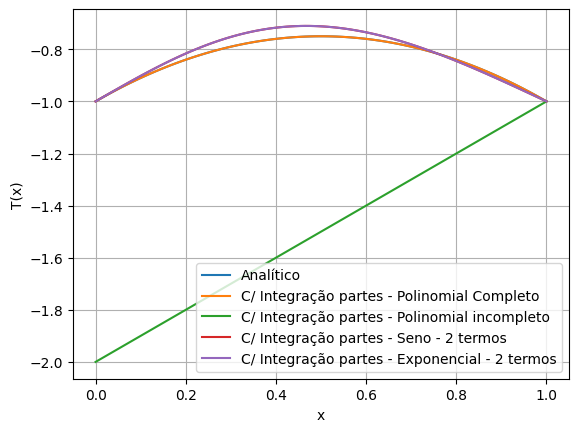

In [43]:
T.prepara_plot(T_analitico,x,x0,x1,"Analítico")
T.prepara_plot(f_residuos_pond_4,x,x0,x1,"C/ Integração partes - Polinomial Completo")
T.prepara_plot(f_residuos_pond_5,x,x0,x1,"C/ Integração partes - Polinomial incompleto")
T.prepara_plot(f_residuos_pond_6,x,x0,x1,"C/ Integração partes - Seno - 2 termos")
T.prepara_plot(f_residuos_pond_6,x,x0,x1,"C/ Integração partes - Exponencial - 2 termos")
plt.xlabel('x')
plt.ylabel('T(x)')
plt.grid(True)
plt.legend()
plt.show()